In [78]:
from policyengine_uk import Microsimulation
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sim = Microsimulation()
total_income = sim.calculate("total_income", 2024, map_to="household").values
constituencies_2010 = pd.read_csv("../policyengine_uk_local_areas/constituencies_2010.csv")
constituencies_2024 = pd.read_csv("../policyengine_uk_local_areas/constituencies_2024.csv")

hex_locations_2010 = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2010.csv")
hex_locations_2024 = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2024.csv")

with h5py.File("../constituencies/weights.h5", "r") as f:
    weights = f["weight"][:]



# weights = f(weights)
total_income_by_const = np.dot(weights, total_income)
df = constituencies_2010.copy()
df["total_income"] = total_income_by_const
df.sort_values("total_income")

,code,name,total_income
577,S14000027,Na h-Eileanan an Iar,3.995325e+08
630,W07000061,Dwyfor Meirionnydd,7.642968e+08
601,S14000051,Orkney and Shetland,8.005697e+08
626,W07000057,Arfon,8.373120e+08
621,W07000052,Rhondda,8.415813e+08
...,...,...,...
366,E14000896,Richmond Park,9.129330e+09
99,E14000629,Chelsea and Fulham,1.262195e+10
109,E14000639,Cities of London and Westminster,1.451267e+10
197,E14000727,Hampstead and Kilburn,1.461939e+10


In [79]:
import h5py
with h5py.File("../constituencies/weights.h5", "r") as f:
    weights = f["weight"][:]
mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)

# mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
# mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
# mapping_matrix = mapping_matrix.div(mapping_matrix.sum(axis=1), axis=0)
# mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)

In [80]:
weights_2024 = mapping_matrix.T.dot(weights)
total_income_by_const = np.dot(weights_2024, total_income)
total_income_df = pd.DataFrame({
    'code': mapping_matrix.columns,
    'total_income': total_income_by_const
})
df_2024_with_names = total_income_df.merge(
    constituencies_2024[['code', 'name']], 
    on='code', 
    how='left'
)
df_2024_with_names = df_2024_with_names.sort_values('code').reset_index(drop=True)
df_2024_with_names.sort_values("total_income")

,code,total_income,name
562,S14000027,3.995325e+08,Na h-Eileanan an Iar
565,S14000051,8.005697e+08,Orkney and Shetland
633,W07000096,8.994103e+08,Dwyfor Meirionnydd
620,W07000083,9.521096e+08,Bangor Aberconwy
42,E14001105,9.565015e+08,Blackpool South
...,...,...,...
202,E14001265,9.318821e+09,Hampstead and Highgate
227,E14001290,1.063929e+10,Holborn and St Pancras
109,E14001172,1.108298e+10,Cities of London and Westminster
97,E14001160,1.118574e+10,Chelsea and Fulham


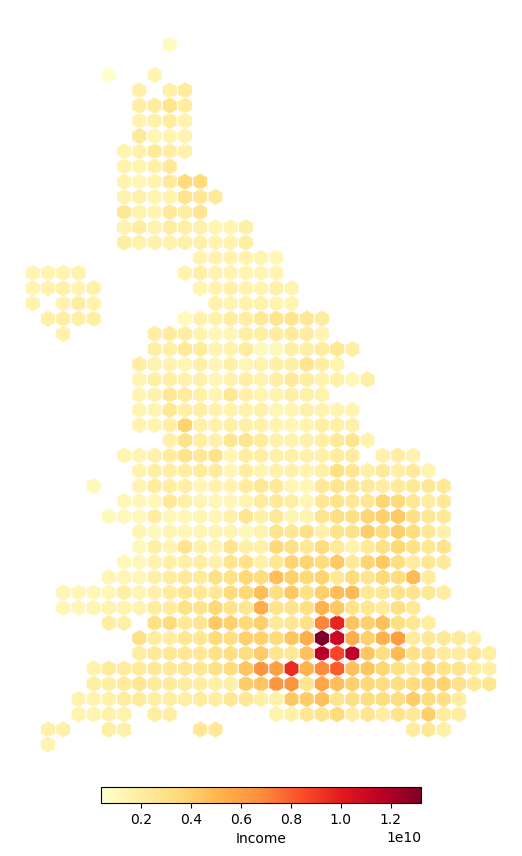

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

# Calculate proper hexagon size based on your data's grid spacing
# You might need to adjust this value based on your x,y coordinates
hex_size = 150  # This should match the spacing between your hex centers

scatter = ax.scatter(
    merged_df_2024['x'], 
    merged_df_2024['y'], 
    c=merged_df_2024['total_income'],  
    cmap='YlOrRd',
    alpha=1,
    marker='h',  # hexagon markers
    s=hex_size,
    linewidths=0.5,
    edgecolors='white'
)

cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])  # [left, bottom, width, height]

# Create horizontal colorbar
cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label='Income')

ax.set_aspect('equal')  # This is crucial for proper hexagon shape
ax.axis('off')
# ax.set_title('Income Distribution 2024', pad=20, fontsize=14)
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

In [ ]:
# def rotated_hexagon(rotation_deg=30):
#     """Create a custom hexagon marker rotated by specified degrees"""
#     import numpy as np
#     from matplotlib.path import Path
    
#     # Convert degrees to radians
#     rotation = np.deg2rad(rotation_deg)
    
#     # Create regular hexagon vertices (7 points to close the shape)
#     angles = np.linspace(0, 2*np.pi, 7)  # 7 points to complete the hexagon
#     vertices = np.array([(np.cos(angle + rotation), 
#                          np.sin(angle + rotation)) for angle in angles])
    
#     # Create the path with proper codes
#     codes = [Path.MOVETO] + [Path.LINETO] * 5 + [Path.CLOSEPOLY]
#     return Path(vertices, codes)

# fig, ax = plt.subplots(figsize=(8, 8))

# # Create rotated hexagon marker (e.g., 30 degrees)
# hex_marker = rotated_hexagon(60)

# scatter = ax.scatter(
#     merged_df_2024['x'], 
#     merged_df_2024['y'], 
#     c=merged_df_2024['total_income'],  
#     cmap='YlOrRd',
#     alpha=1,
#     marker=hex_marker,
#     s=150,
#     linewidths=0.5,
#     edgecolors='white'
# )

# cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])

# cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label='Total Income')

# ax.set_aspect('equal')
# ax.axis('off')
# ax.set_facecolor('#f0f0f0')
# fig.patch.set_facecolor('white')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))

# # Calculate proper aspect ratio for regular hexagons
# hex_aspect = np.sqrt(3) / 2.4  # This gives regular hexagons

# # Use hexbin with adjusted parameters
# hb = ax.hexbin(
#     merged_df_2024['x'], 
#     merged_df_2024['y'], 
#     C=merged_df_2024['total_income'],
#     gridsize=22,
#     cmap='YlOrRd',
#     linewidths=0.2,
#     edgecolors='white'
# )

# cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])

# # Create horizontal colorbar
# cbar = plt.colorbar(hb, cax=cax, orientation='horizontal', label='Total Income')

# # Set aspect ratio for regular hexagons
# ax.set_aspect(hex_aspect)
# ax.axis('off')
# ax.set_facecolor('#f0f0f0')
# fig.patch.set_facecolor('white')

# plt.tight_layout()
# plt.show()

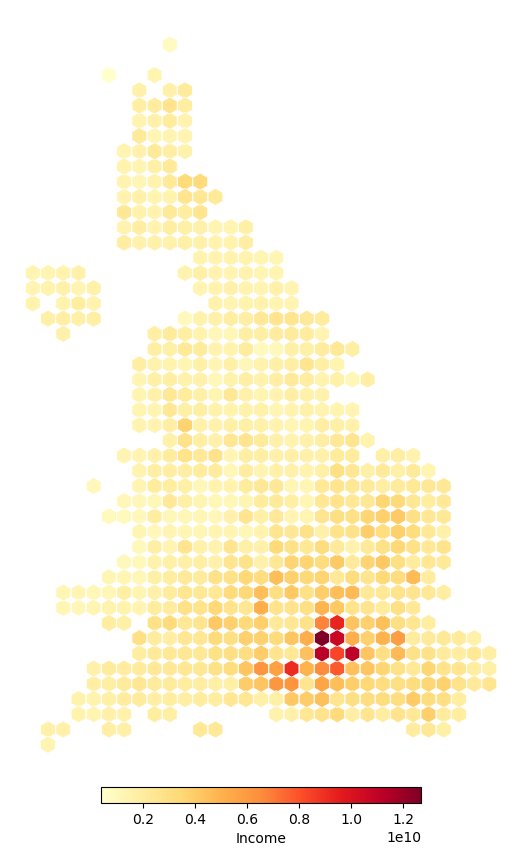

In [82]:
def create_income_map(year):
    """
    Create a hexagonal map of income distribution for a given year (2024 onwards).
    
    Parameters:
    year (int): The year to calculate income distribution for
    
    Returns:
    matplotlib figure
    """
    # Calculate total income for the given year
    sim = Microsimulation()
    total_income = sim.calculate("total_income", year, map_to="household").values
    
    # Load constituency and hex data
    constituencies = pd.read_csv("../policyengine_uk_local_areas/constituencies_2024.csv")
    hex_locations = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2024.csv")
    
    # Calculate income using 2024 boundaries
    with h5py.File("../constituencies/weights.h5", "r") as f:
        weights = f["weight"][:]
    
    mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
    mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
    mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)
    
    weights_2024 = mapping_matrix.T.dot(weights)
    total_income_by_const = np.dot(weights_2024, total_income)
    
    # Create dataframe
    df = pd.DataFrame({
        'code': mapping_matrix.columns,
        'total_income': total_income_by_const
    })
    df = df.merge(constituencies[['code', 'name']], on='code', how='left')
    merged_df = pd.merge(df, hex_locations, on='code', how='inner')
    
    # Create plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    scatter = ax.scatter(
        merged_df['x'], 
        merged_df['y'], 
        c=merged_df['total_income'],  
        cmap='YlOrRd',
        alpha=1,
        marker='h',
        s=150,
        linewidths=0.5,
        edgecolors='white'
    )
    
    cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])
    cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label='Income')
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('#f0f0f0')
    fig.patch.set_facecolor('white')
    
    plt.tight_layout()
    
    return fig

# Example usage:
fig = create_income_map(2024)
plt.show()

In [121]:
from policyengine_uk import Microsimulation
from policyengine_core.reforms import Reform

reform = Reform.from_dict({
  "gov.contrib.labour.private_school_vat": {
    "2025-01-01.2025-12-31": 0.2
  },
  "gov.contrib.policyengine.budget.high_income_incident_tax_change": {
    "2024-01-01.2100-12-31": 5.9
  },
  "gov.contrib.policyengine.employer_ni.employee_incidence": {
    "2025-01-01.2025-12-31": 0.4,
    "2026-01-01.2026-12-31": 0.5,
    "2027-01-01.2027-12-31": 0.6,
    "2028-01-01.2030-12-31": 0.7
  },
  "gov.contrib.policyengine.employer_ni.exempt_employer_pension_contributions": {
    "2024-01-01.2100-12-31": False
  },
  "gov.hmrc.cgt.additional_rate": {
    "2025-01-01.2025-12-31": 0.24
  },
  "gov.hmrc.cgt.higher_rate": {
    "2025-01-01.2025-12-31": 0.24
  }
}, country_id="uk")


baseline = Microsimulation()
reformed = Microsimulation(reform=reform)
baseline_income = baseline.calculate("real_household_net_income", period=2024)
reformed_income = reformed.calculate("real_household_net_income", period=2029)
baseline_people = baseline.calculate("people", map_to = "household", period=2024)
reformed_people = baseline.calculate("people", map_to = "household", period=2029)

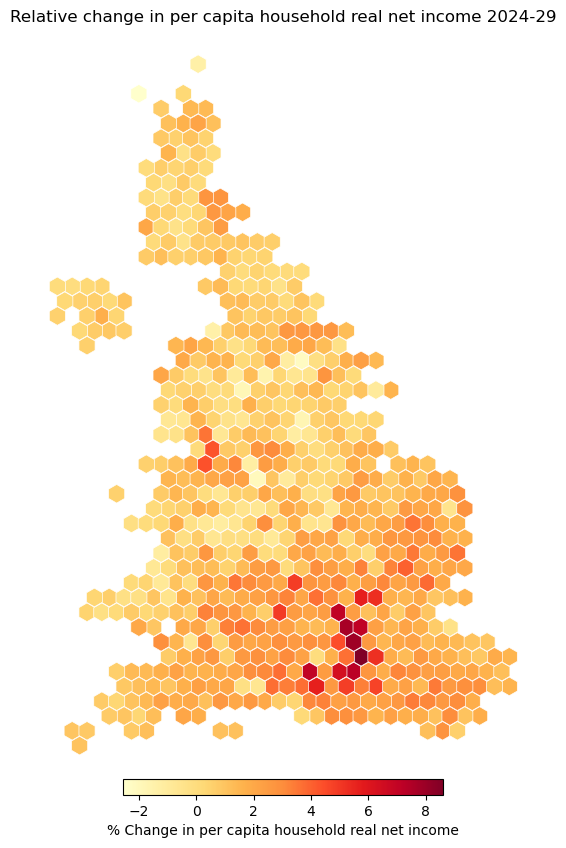

In [128]:
fig, ax = plt.subplots(figsize=(8, 8))

def plot_income_difference_map():
    constituencies = pd.read_csv("../policyengine_uk_local_areas/constituencies_2024.csv")
    hex_locations = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2024.csv")
    
    with h5py.File("../constituencies/weights.h5", "r") as f:
        weights = f["weight"][:]
    
    mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
    mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
    mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)
    
    weights_2024 = mapping_matrix.T.dot(weights)
    
    # Calculate income and population for each constituency
    income_2024 = np.dot(weights_2024, baseline_income.values)
    income_2029 = np.dot(weights_2024, reformed_income.values)
    population_2024 = np.dot(weights_2024, baseline_people.values)
    population_2029 = np.dot(weights_2024, reformed_people.values)
    
    # Calculate per capita income for each year
    per_capita_2024 = income_2024 / population_2024
    per_capita_2029 = income_2029 / population_2029
    
    # Calculate relative difference in per capita income
    income_difference = (per_capita_2029 - per_capita_2024) / per_capita_2024 * 100
    
    df = pd.DataFrame({
        'code': mapping_matrix.columns,
        'income_difference': income_difference
    })
    df = df.merge(constituencies[['code', 'name']], on='code', how='left')
    merged_df = pd.merge(df, hex_locations, on='code', how='inner')

    merged_df.x = merged_df.x + (merged_df.y % 2 == 0) * 0.5
    
    scatter = ax.scatter(
        merged_df['x'], 
        merged_df['y'], 
        c=merged_df['income_difference'],  
        cmap='YlOrRd',
        alpha=1,
        marker='h',
        s=180,
        linewidths=0.5,
        edgecolors='white'
    )
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('#f0f0f0')
    ax.set_title('Relative change in per capita household real net income 2024-29')
    
    return scatter

scatter = plot_income_difference_map()

# Add colorbar at the bottom
cax = fig.add_axes([0.3, 0, 0.4, 0.02])
cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label='% Change in per capita household real net income')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

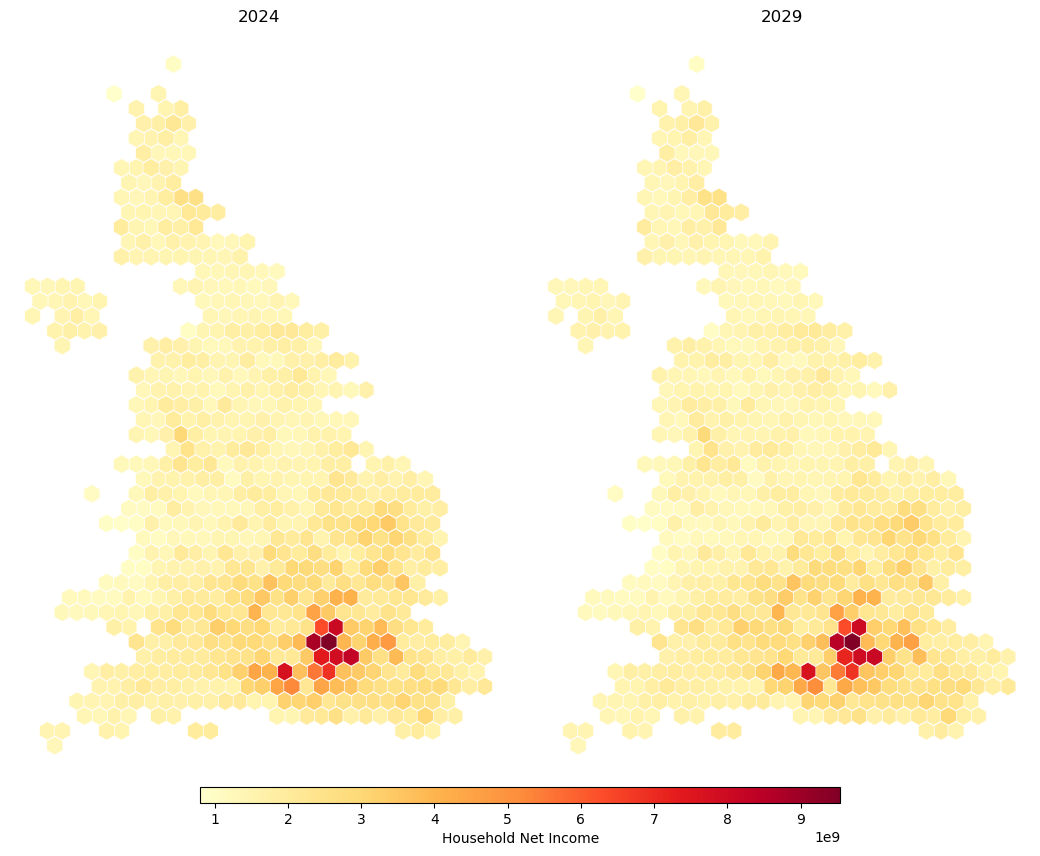

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

def plot_income_map(income_values, year, ax, title):
    # Load constituency and hex data 
    constituencies = pd.read_csv("../policyengine_uk_local_areas/constituencies_2024.csv")
    hex_locations = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2024.csv")
    
    # Calculate income using 2024 boundaries
    with h5py.File("../constituencies/weights.h5", "r") as f:
        weights = f["weight"][:]
    
    mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
    mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
    mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)
    
    weights_2024 = mapping_matrix.T.dot(weights)
    total_income_by_const = np.dot(weights_2024, income_values)
    
    # Create dataframe
    df = pd.DataFrame({
        'code': mapping_matrix.columns,
        'total_income': total_income_by_const
    })
    df = df.merge(constituencies[['code', 'name']], on='code', how='left')
    merged_df = pd.merge(df, hex_locations, on='code', how='inner')

    merged_df.x = merged_df.x + (merged_df.y % 2 == 0) * 0.5
    
    scatter = ax.scatter(
        merged_df['x'], 
        merged_df['y'], 
        c=merged_df['total_income'],  
        cmap='YlOrRd',
        alpha=1,
        marker='h',
        s=180,
        linewidths=0.5,
        edgecolors='white'
    )
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('#f0f0f0')
    ax.set_title(title)
    
    return scatter

# Plot baseline 2024
scatter1 = plot_income_map(baseline_income.values, 2024, ax1, '2024')
# Plot reformed 2029
scatter2 = plot_income_map(reformed_income.values, 2029, ax2, '2029')

# Add colorbar at the bottom spanning both subplots
cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])
cbar = plt.colorbar(scatter1, cax=cax, orientation='horizontal', label='Household Net Income')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.subplots_adjust(wspace=-0.5)
plt.show()

In [124]:
# Calculate income by constituency for both scenarios
def get_constituency_income(income_values):
    with h5py.File("../constituencies/weights.h5", "r") as f:
        weights = f["weight"][:]
    
    mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
    mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
    mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)
    
    weights_2024 = mapping_matrix.T.dot(weights)
    return np.dot(weights_2024, income_values)

# Get constituency-level incomes
baseline_const = get_constituency_income(baseline_income.values)
reformed_const = get_constituency_income(reformed_income.values)

# Check if they're identical
are_identical = np.array_equal(baseline_const, reformed_const)
print(f"Are the maps identical? {are_identical}")

# If not identical, show some statistics about the differences
if not are_identical:
    diff = reformed_const - baseline_const
    print(f"\nDifference statistics:")
    print(f"Mean difference: {diff.mean():.2f}")
    print(f"Max difference: {diff.max():.2f}")
    print(f"Min difference: {diff.min():.2f}")
    print(f"Standard deviation of differences: {diff.std():.2f}")
    print(f"\nNumber of constituencies with changes: {np.sum(diff != 0)} out of {len(diff)}")

Are the maps identical? False

Difference statistics:
Mean difference: 38112953.84
Max difference: 753320003.28
Min difference: -27295586.16
Standard deviation of differences: 70938845.10

Number of constituencies with changes: 650 out of 650


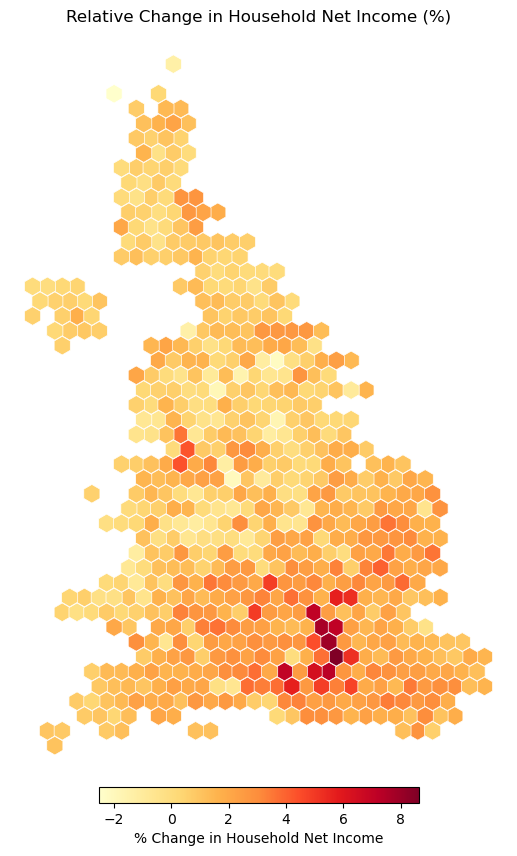

In [125]:
fig, ax = plt.subplots(figsize=(8, 8))

def plot_income_difference_map():
    constituencies = pd.read_csv("../policyengine_uk_local_areas/constituencies_2024.csv")
    hex_locations = pd.read_csv("../policyengine_uk_local_areas/hex_map/hex_map_2024.csv")
    
    with h5py.File("../constituencies/weights.h5", "r") as f:
        weights = f["weight"][:]
    
    mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
    mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
    mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)
    
    weights_2024 = mapping_matrix.T.dot(weights)
    income_2024 = np.dot(weights_2024, baseline_income.values)
    income_2029 = np.dot(weights_2024, reformed_income.values)
    
    # Calculate relative difference as percentage
    income_difference = (income_2029 - income_2024) / income_2024 * 100
    
    df = pd.DataFrame({
        'code': mapping_matrix.columns,
        'income_difference': income_difference
    })
    df = df.merge(constituencies[['code', 'name']], on='code', how='left')
    merged_df = pd.merge(df, hex_locations, on='code', how='inner')

    merged_df.x = merged_df.x + (merged_df.y % 2 == 0) * 0.5
    
    scatter = ax.scatter(
        merged_df['x'], 
        merged_df['y'], 
        c=merged_df['income_difference'],  
        cmap='YlOrRd',  # Same colormap as original
        alpha=1,
        marker='h',
        s=180,
        linewidths=0.5,
        edgecolors='white'
    )
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('#f0f0f0')
    ax.set_title('Relative Change in Household Net Income (%)')
    
    return scatter

scatter = plot_income_difference_map()

# Add colorbar at the bottom
cax = fig.add_axes([0.3, -0.01, 0.4, 0.02])
cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label='% Change in Household Net Income')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()